In [8]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cpu")

In [2]:
def Hub_the(z,om,H0):
    return H0*np.sqrt(om*pow(1+z,3)+1-om)

h_data = np.genfromtxt("./data/hubel.dat") 

In [97]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.SELU(),
    torch.nn.Linear(10,20),
    torch.nn.SELU(),
    torch.nn.Linear(20,10),
    torch.nn.SELU(),
    torch.nn.Linear(10,1),
    torch.nn.Flatten(0, 1)
)

def loss_fn(y_pred,y):
    return ((y_pred - y)/err_y).pow(2).sum()

In [98]:
x = torch.from_numpy(h_data[:,0]).float()
x = torch.reshape(x,(39,1))

#print(x.size())
y = torch.from_numpy(h_data[:,1]).float()
err_y = torch.from_numpy(h_data[:,2]).float()


y_pred = model(x)

#x.reshape(-1,1)
#y_pred.size()
tot_par = sum([param.nelement() for param in model.parameters()])

loss = loss_fn(y_pred,y)
loss.item()

13288.46875

In [38]:
loss_fn = torch.nn.MSELoss(reduction='sum')
loss = loss_fn(y_pred,y)

In [100]:
learning_rate = 1e-4
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(20000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 1000 == 1:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    #linear_layer = model[0]
    #print(linear_layer.weight)

1 19.047082901000977
1001 17.238155364990234
2001 17.136157989501953
3001 17.083459854125977
4001 17.05913543701172
5001 17.042076110839844
6001 17.02992057800293
7001 17.018842697143555
8001 17.005756378173828
9001 16.98947525024414
10001 16.972305297851562
11001 16.955284118652344
12001 16.936031341552734
13001 16.91474151611328
14001 16.89153289794922
15001 16.86606216430664
16001 16.837261199951172
17001 16.806827545166016
18001 16.752361297607422
19001 16.64373779296875


tensor(73.9490, grad_fn=<SelectBackward0>)


<ErrorbarContainer object of 3 artists>

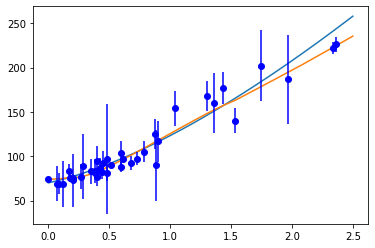

In [102]:
x_test = torch.linspace(0, 2.5, 2000, device=device, dtype=dtype)
x_test = torch.reshape(x_test,(2000,1))
y_th = Hub_the(x_test,0.3,70)
y_test = model(x_test)

print(y_test[0])
plt.plot(x_test,y_th)
plt.plot(x_test.detach().numpy().reshape(-1,),y_test.detach().numpy())
plt.errorbar(h_data[:,0],h_data[:,1],yerr=h_data[:,2],fmt="bo")